In [1]:
# STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

# STEP 2: Load the Dataset
df = pd.read_csv("transport.csv")

# STEP 3: Basic Inspection
print("Initial Data Info:\n")
print(df.info())


Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None


In [2]:
print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [3]:
print("\nFirst 5 Rows:\n")
print(df.head())



First 5 Rows:

         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30-08-2024        16436       10705           225        19026    3925   
1  15-09-2023        15499       10671           267        18421    4519   
2  28-12-2021         1756        2352             0         3775       0   
3  11-01-2023        10536        8347           223        14072       0   
4  11-09-2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [4]:

# STEP 4: Data Cleaning and Preprocessing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Ensure day-first format
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Optional: Print cleaned data summary
print("\nCleaned Data:\n")
print(df.describe())



Cleaned Data:

        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   

             Other  
count  1911.000000  
mean     43.102564  
std      41.750906  
min       0.000000  
25%      14.000000  
50%      40.000000  
75%      68.000000  
max    1105.000000  


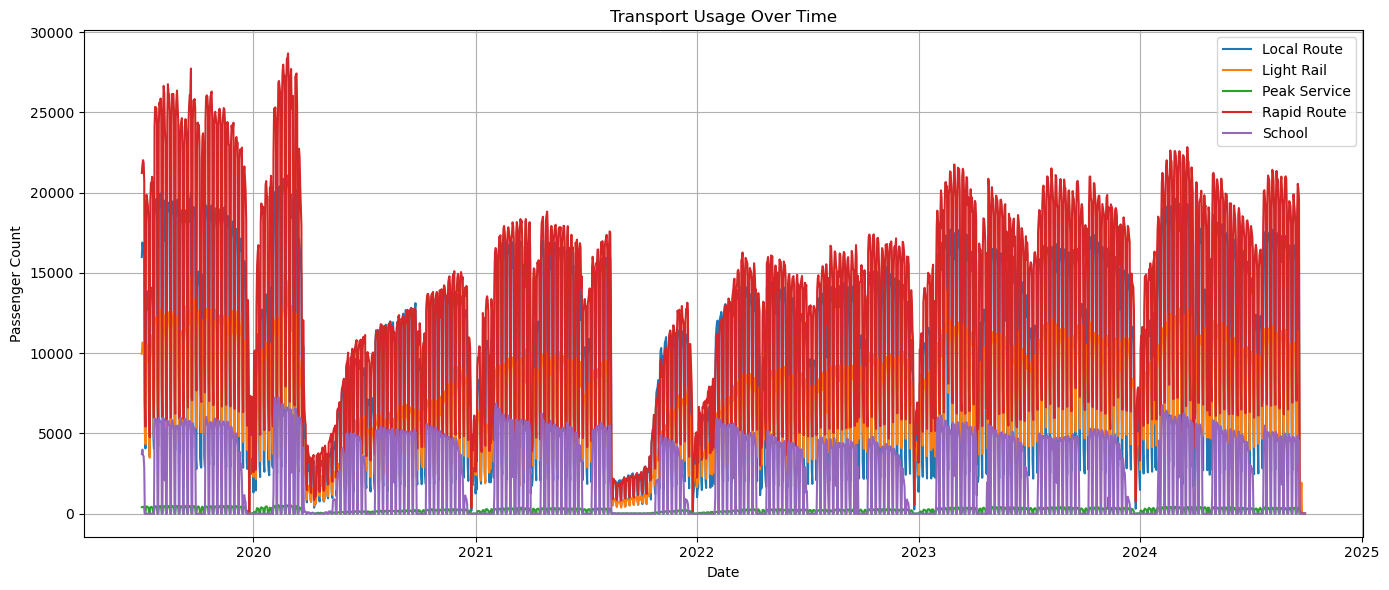

In [5]:

# STEP 5: EDA - Time Series Line Plot
plt.figure(figsize=(14, 6))
columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
for col in columns:
    plt.plot(df['Date'], df[col], label=col)

plt.title("Transport Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


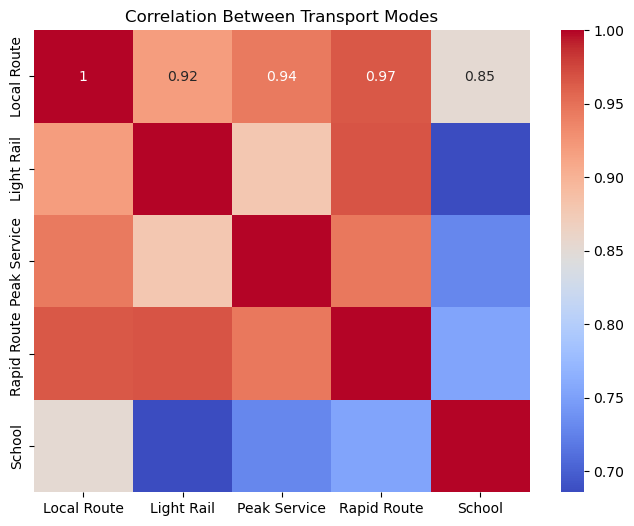

In [6]:

# STEP 6: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Transport Modes")
plt.show()



🔮 Forecasting for: Local Route


10:53:16 - cmdstanpy - INFO - Chain [1] start processing
10:53:16 - cmdstanpy - INFO - Chain [1] done processing


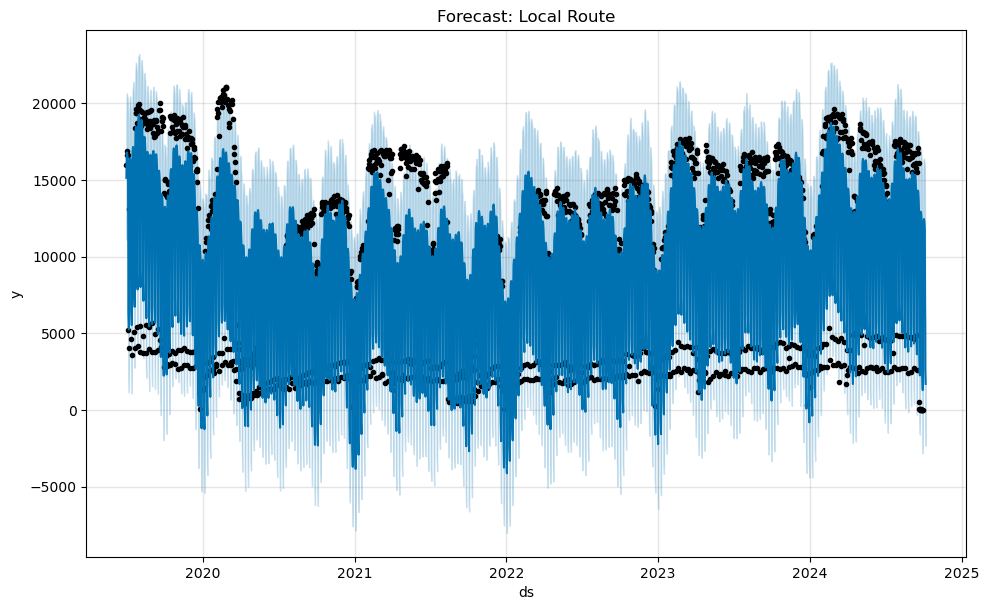

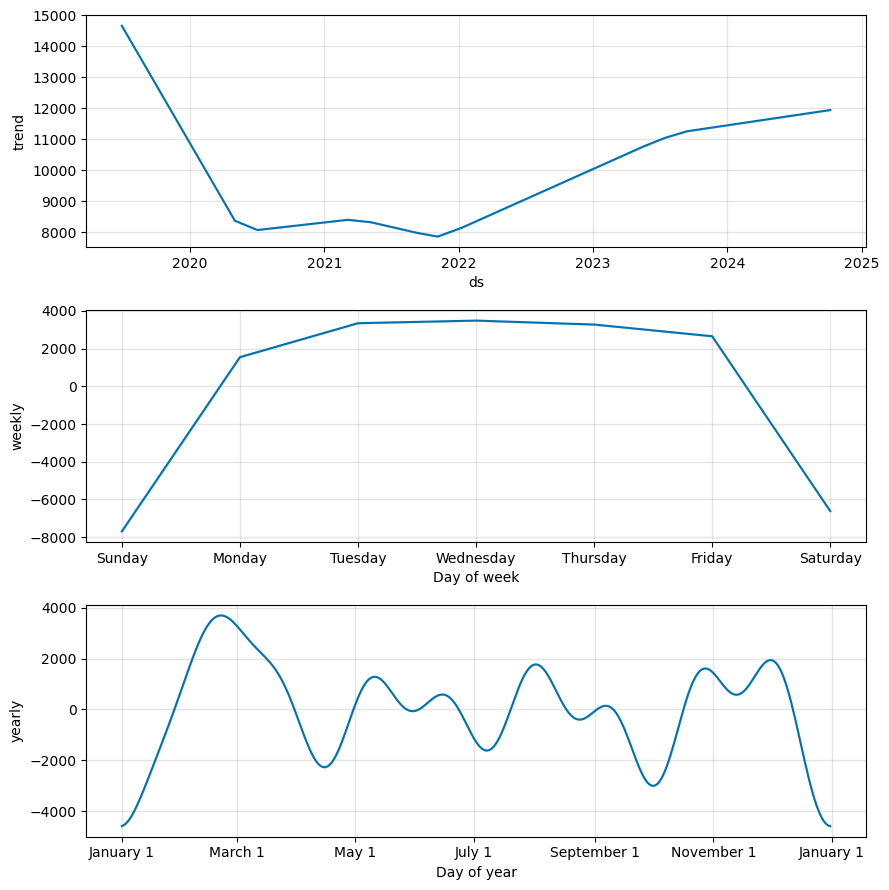

✅ Forecast saved to: forecast_local_route.csv

🔮 Forecasting for: Light Rail


10:53:19 - cmdstanpy - INFO - Chain [1] start processing
10:53:19 - cmdstanpy - INFO - Chain [1] done processing


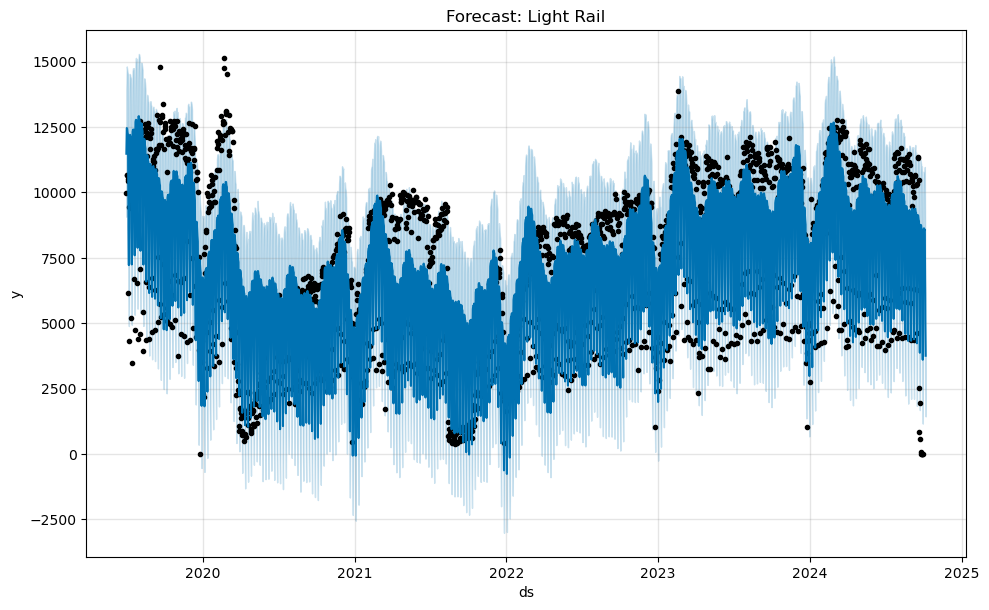

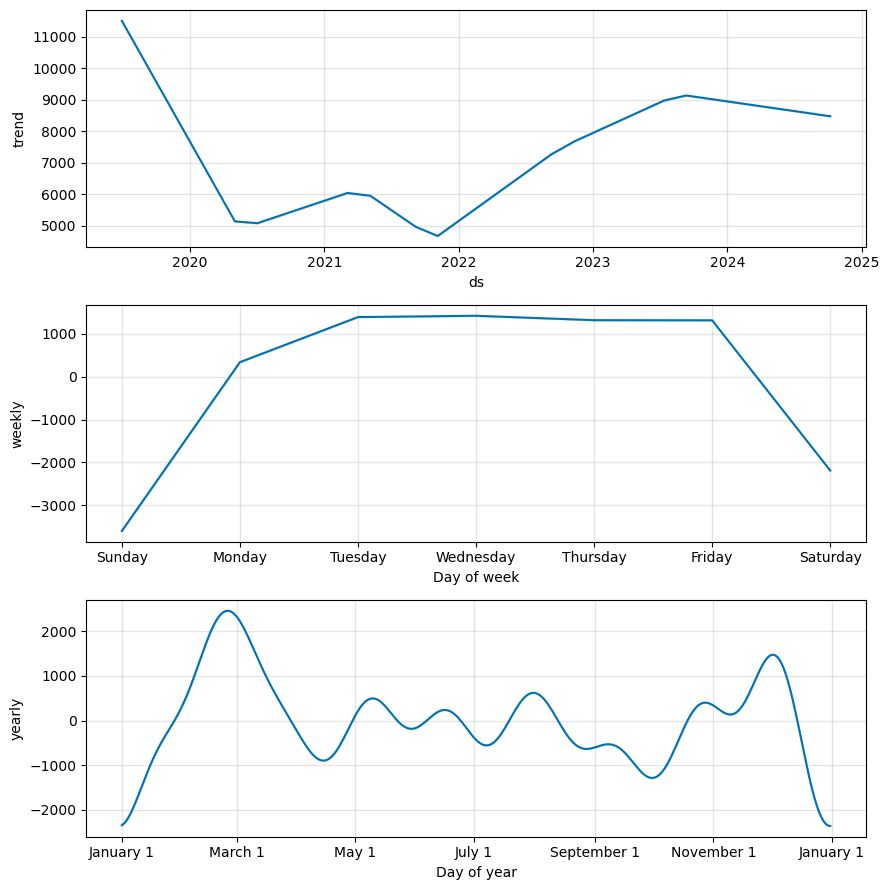

✅ Forecast saved to: forecast_light_rail.csv

🔮 Forecasting for: Peak Service


10:53:22 - cmdstanpy - INFO - Chain [1] start processing
10:53:22 - cmdstanpy - INFO - Chain [1] done processing


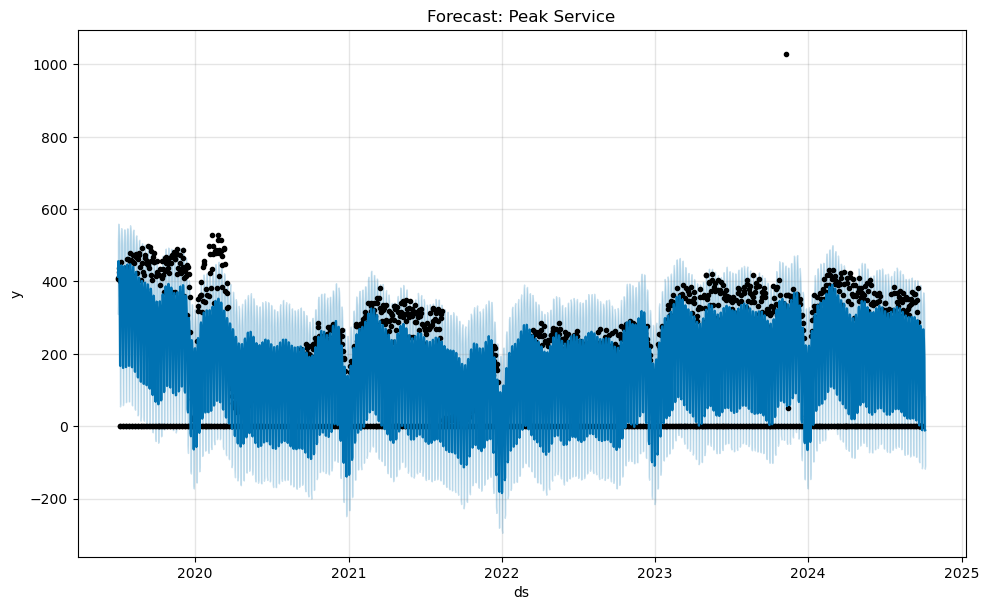

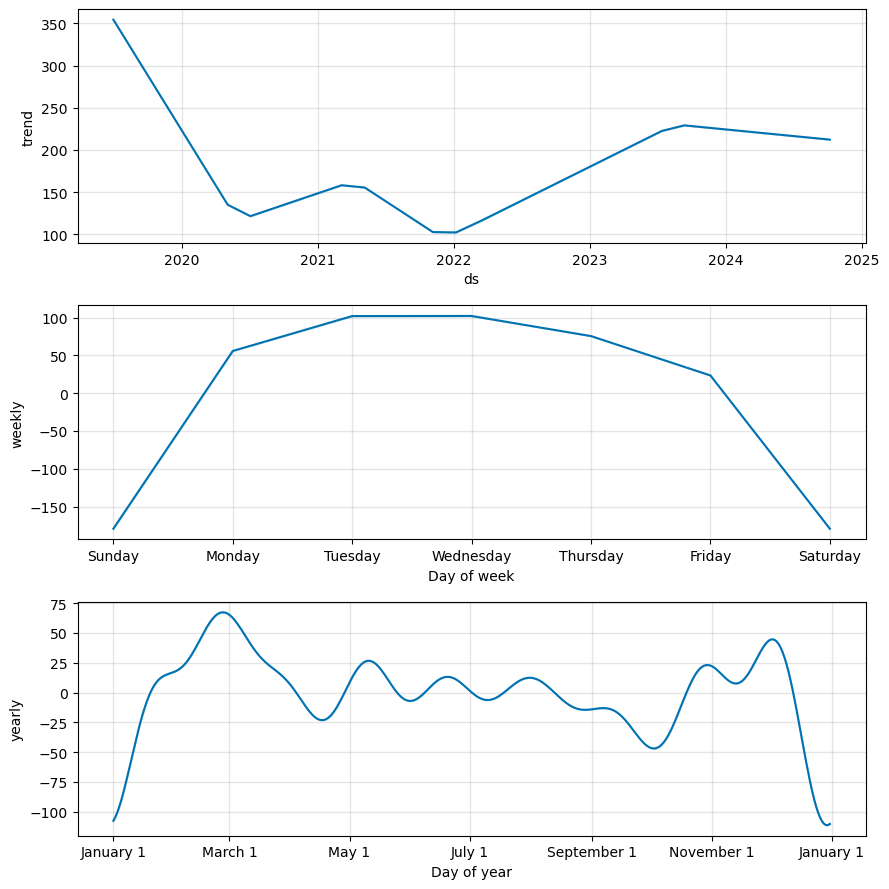

✅ Forecast saved to: forecast_peak_service.csv

🔮 Forecasting for: Rapid Route


10:53:25 - cmdstanpy - INFO - Chain [1] start processing
10:53:26 - cmdstanpy - INFO - Chain [1] done processing


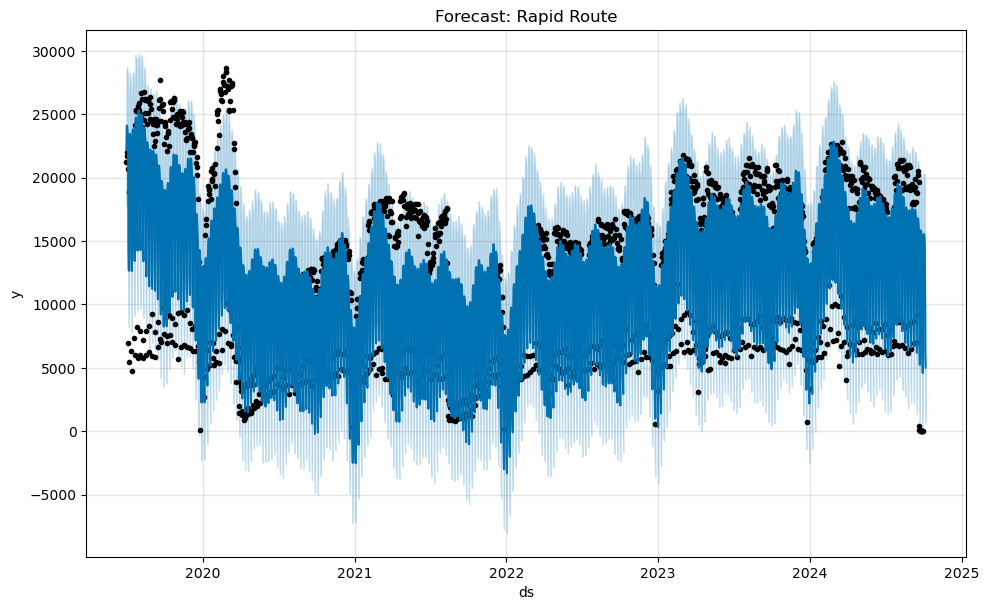

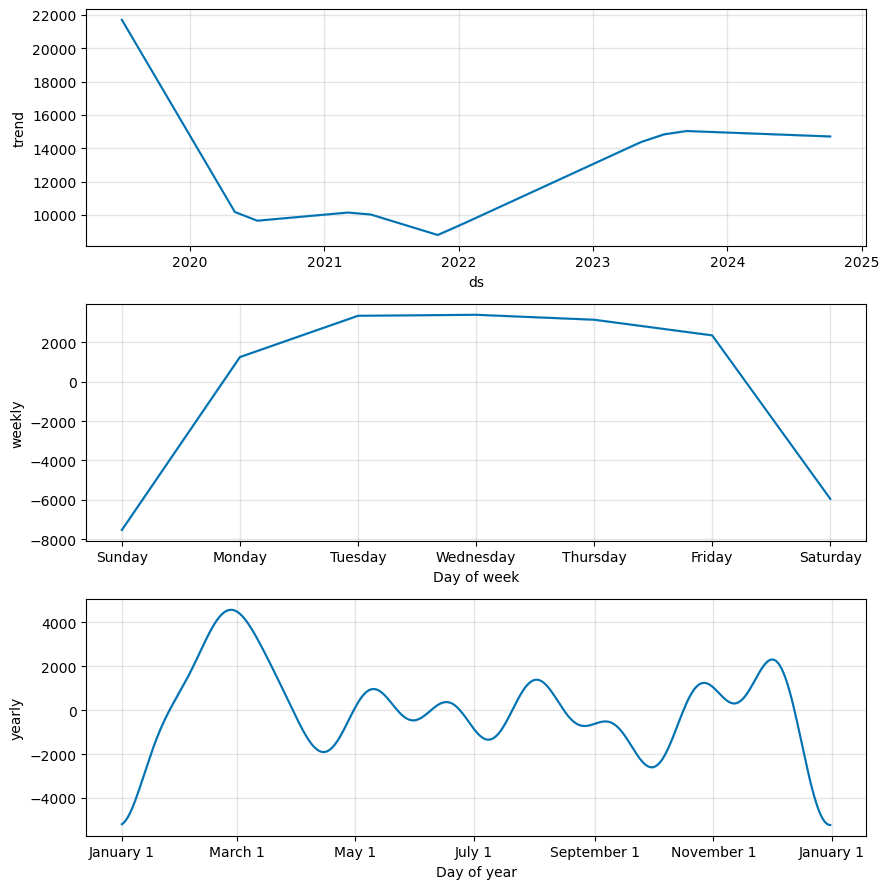

✅ Forecast saved to: forecast_rapid_route.csv

🔮 Forecasting for: School


10:53:28 - cmdstanpy - INFO - Chain [1] start processing
10:53:29 - cmdstanpy - INFO - Chain [1] done processing


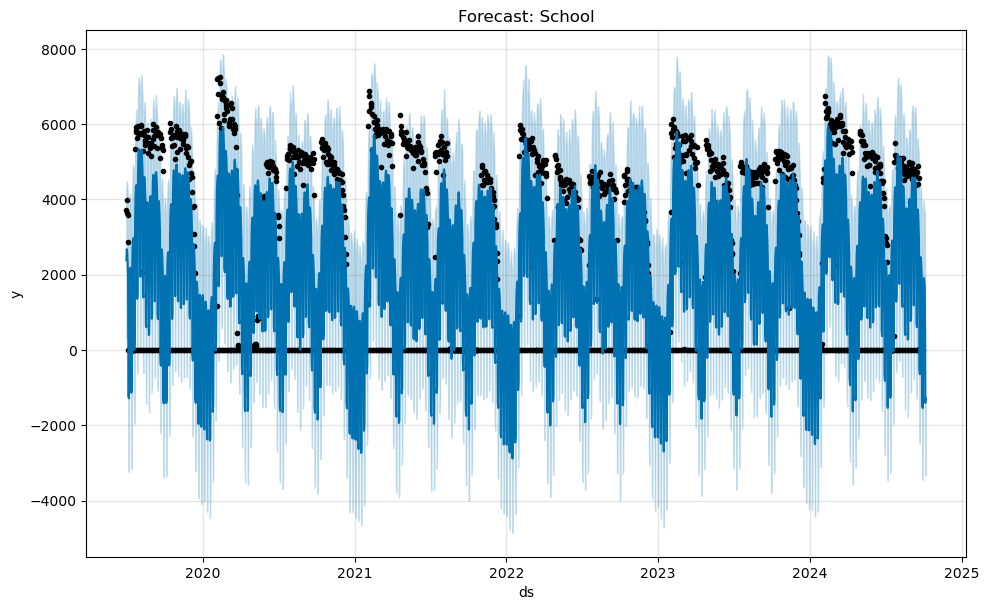

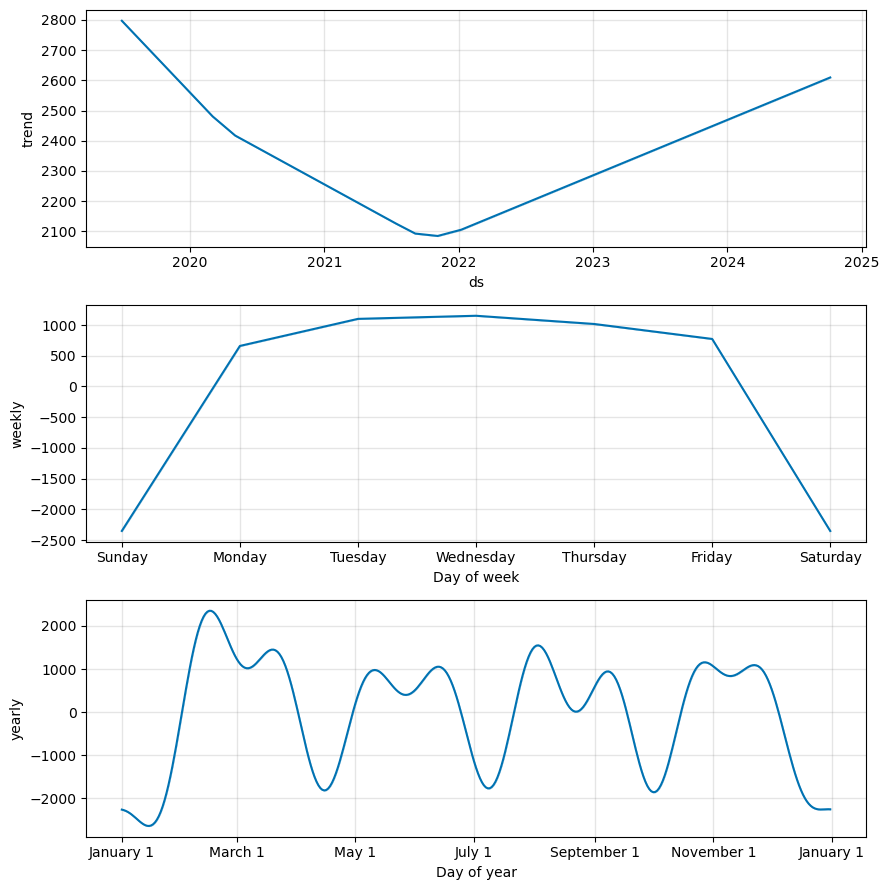

✅ Forecast saved to: forecast_school.csv


In [7]:

# STEP 7: Prophet Forecasting Function
def forecast_route(dataframe, column_name, days=7):
    print(f"\n🔮 Forecasting for: {column_name}")
    
    # Prepare data for Prophet
    prophet_df = dataframe[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    
    # Initialize and train model
    model = Prophet()
    model.fit(prophet_df)
    
    # Create future dataframe and forecast
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    
    # Plot forecast
    model.plot(forecast)
    plt.title(f"Forecast: {column_name}")
    plt.show()
    
    # Plot forecast components (trend, weekly, yearly)
    model.plot_components(forecast)
    plt.tight_layout()
    plt.show()
    
    # Save forecast
    save_path = f"forecast_{column_name.lower().replace(' ', '_')}.csv"
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(save_path, index=False)
    print(f"✅ Forecast saved to: {save_path}")

# STEP 8: Forecast for Each Transport Mode
for route in columns:
    forecast_route(df, route, days=7)
